3. For the same IRIS dataset, your next task is to perform correlation analysis to understand the relationships between these attributes. 


a. Load the Iris dataset into Python and explore its structure, ensuring it contains relevant numerical attributes for correlation analysis.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Loading the dataset into  a dataframe.
df = pd.read_csv('./iris.csv')

In [53]:
#Checking for any null values.
has_nulls = df.isnull().any().any()
print(has_nulls)

#False tells us that there are no null values.

False


In [54]:
# Function for standardizing to ensure relevant numerical attributes.
def standardize(X, mean, dev):
    return X - mean / dev
    
#Seperate features.
X = df.drop(columns = 'variety')

#Mean.
mean = X.mean()

#Standard deviation.
dev = X.std()

#Standardize the data
std_df = standardize(X, mean, dev)

In [55]:
#Displaying the new df.
print(std_df)

     sepal.length  sepal.width  petal.length  petal.width
0       -1.956602    -3.514384     -0.728819    -1.373438
1       -2.156602    -4.014384     -0.728819    -1.373438
2       -2.356602    -3.814384     -0.828819    -1.373438
3       -2.456602    -3.914384     -0.628819    -1.373438
4       -2.056602    -3.414384     -0.728819    -1.373438
..            ...          ...           ...          ...
145     -0.356602    -4.014384      3.071181     0.726562
146     -0.756602    -4.514384      2.871181     0.326562
147     -0.556602    -4.014384      3.071181     0.426562
148     -0.856602    -3.614384      3.271181     0.726562
149     -1.156602    -4.014384      2.971181     0.226562

[150 rows x 4 columns]


b. Calculate the correlation coefficient between each pair of attributes in the Iris dataset.

In [56]:
#Function for calculating the correlation coeffeicient between each pair of attributes in the dataset.
#It takes two features and computes the correlation.

def corre_coeff(x, y):

    n = len(x)

    # Calculate sums
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2, sum_y2 = 0, 0
    sum_xy = 0

    for xi in x:
        sum_x2 += xi**2
    
    for yi in y:
        sum_y2 += yi**2
    
    
    for xi, yi in zip(x, y):
        sum_xy += xi *yi

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2)) ** 0.5

    correlation_coefficient = numerator / denominator

    return correlation_coefficient


def make_matrix(df):
    
    #features and length of them
    features = df.columns
    n = len(features)

    #Init a zero based matrix
    corr_matrix = [[0] * n for _ in range(n)] 

    for i in range(n):
        for j in range(n):
            if i <= j:
                corr = corre_coeff(df[features[i]], df[features[j]])
                corr_matrix[i][j] = corr
                corr_matrix[j][i] = corr

    return corr_matrix


In [57]:
#The correlation coefficients between the pairs is represented using the below matrix.
corr_matrix = make_matrix(std_df)
corr_matrix = np.array(corr_matrix)
print(corr_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


c.Visualize the correlation matrix using a heatmap to better understand the strength and direction of the correlations among the iris flower attributes.

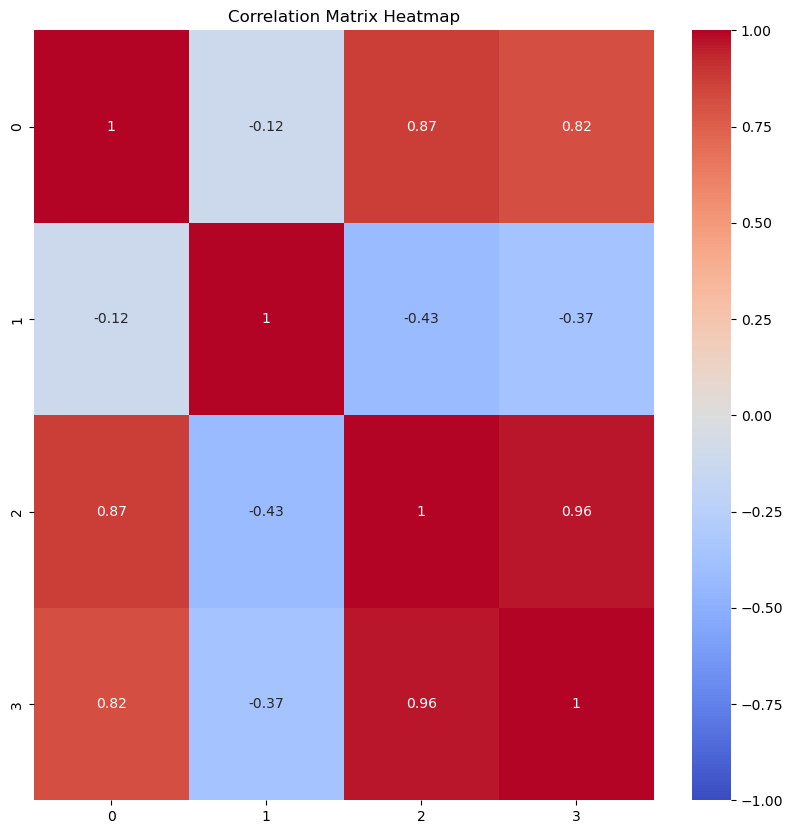

In [58]:
#Visualizing  the correlation matrix using a heatmap
#Plot
plt.figure(figsize=(10, 10))

#Heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#Fixing title for the plot.
plt.title('Correlation Matrix Heatmap')
plt.show()

d.Identify highly correlated attribute pairs, both positively and negatively correlated, and discuss their implications in the context of iris flower characteristics. 


In [59]:
n = len(std_df.columns)

#List to contain highly correlated pairs
corr_pairs = []

#Considering 0.7 as threshold for correlation coefficient.
for i in range(n):
    for j in range(i + 1, n):
        corr_val = corr_matrix[i][j]
        if abs(corr_val) > 0.7:
            corr_pairs.append((df.columns[i], df.columns[j], corr_val))

print("Highly correlated attributes:")
for pair in corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.4f}")

Highly correlated attributes:
sepal.length and petal.length: Correlation = 0.8718
sepal.length and petal.width: Correlation = 0.8179
petal.length and petal.width: Correlation = 0.9629


In [60]:
#Positively correlated.
n = len(std_df.columns)
pos_corr = []

for i in range(n):
    for j in range(i + 1, n):
        corr_val = corr_matrix[i][j]
        if corr_val > 0:
            pos_corr.append((df.columns[i], df.columns[j], corr_val))


print("positively correlated attributes:")
for pair in pos_corr:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.4f}")

positively correlated attributes:
sepal.length and petal.length: Correlation = 0.8718
sepal.length and petal.width: Correlation = 0.8179
petal.length and petal.width: Correlation = 0.9629


In [61]:
#Negatively correlated.
n = len(std_df.columns)
neg_corr = []

for i in range(n):
    for j in range(i + 1, n):
        corr_val = corr_matrix[i][j]
        if corr_val < 0:
            neg_corr.append((df.columns[i], df.columns[j], corr_val))


print("Negatively correlated attributes:")
for pair in neg_corr:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.4f}")

Negatively correlated attributes:
sepal.length and sepal.width: Correlation = -0.1176
sepal.width and petal.length: Correlation = -0.4284
sepal.width and petal.width: Correlation = -0.3661


1. Sepal Length and Sepal Width:
    Typical Correlation: Low or negative correlation.
2. Petal Length and Petal Width:
    Typical Correlation: High correlation.
3. Sepal Length and Petal Length:
    Typical Correlation: Low or moderate correlation.
4. Sepal Width and Petal Width:
    Typical Correlation: Low or moderate correlation.

e. Based on the correlation analysis, draw insights into which attributes might have a strong influence on the characteristics of iris flowers.

Answer:
1. Petal Length and Petal Width
    Correlation: High positive correlation (close to +1).
    Insight: The strong correlation between petal length and petal width suggests that these two attributes are closely related. Larger petals tend to be wider, indicating that petal size is a significant characteristic of the iris flowers. This relationship can help in identifying species or varieties of iris flowers based on petal dimensions.

2. Sepal Length and Petal Length
    Correlation: Low to moderate correlation.
    Insight: The low to moderate correlation suggests that while there is some relationship between sepal length and petal length, it is not very strong. This implies that these attributes vary independently to some extent.

3. Sepal Width and Petal Width
    Correlation: Low to moderate correlation.
    Insight: The low to moderate correlation indicates that sepal width does not have a strong linear relationship with petal width. This suggests variability in how these attributes change relative to each other.

4. Sepal Length and Sepal Width
    Correlation: Low correlation or negative.
    Insight: The low or negative correlation indicates that sepal length and sepal width are not strongly related. This might mean that changes in the sepal length do not consistently affect the sepal width.

Summary:
1. Petal Length and Width: Strongly influence flower characteristics and are crucial for species identification.
2. Sepal Length and Width: Provide additional context but are less predictive of each other and of petal dimensions.